In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, make_circles, make_moons
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
iris = load_iris()
X = iris.data[:, :2]  
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(f"✓ Dataset: {X.shape[0]} samples, {X.shape[1]} features (2D for visualization)")
print(f"✓ Train: {len(X_train)}, Test: {len(X_test)}, Classes: {len(np.unique(y))}")

✓ Dataset: 150 samples, 2 features (2D for visualization)
✓ Train: 105, Test: 45, Classes: 3


In [20]:
def plot_decision_boundary(X, y, model, title, scaler=None):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    mesh_data = np.c_[xx.ravel(), yy.ravel()]
    if scaler:
        mesh_data = scaler.transform(mesh_data)
    Z = model.predict(mesh_data)
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(9, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k', s=50, linewidth=0.5)
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])
    plt.title(title, fontweight='bold', fontsize=12)
    plt.colorbar(label='Class')
    plt.tight_layout()
    plt.show()
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title, fontweight='bold')
    plt.tight_layout()
    plt.show()
print("✓ Helper functions ready")

✓ Helper functions ready



 LINEAR KERNEL SVM
Accuracy: 0.7333
Support Vectors: [ 6 26 24]


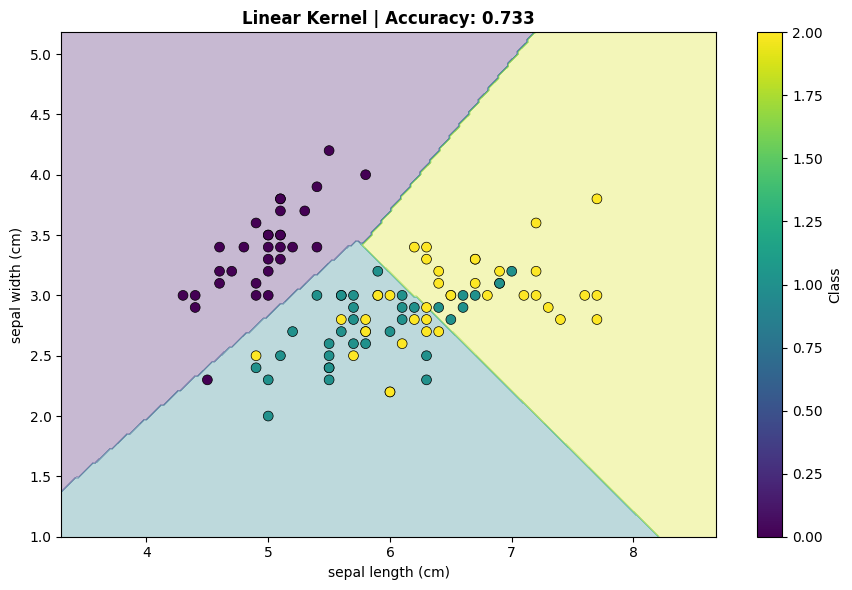

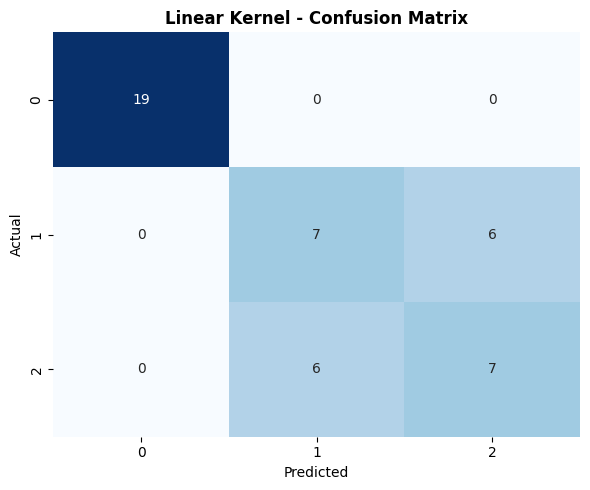

In [21]:
print("\n LINEAR KERNEL SVM")
svm_linear = SVC(kernel='linear', C=1.0, random_state=42)
svm_linear.fit(X_train_scaled, y_train)
y_pred_linear = svm_linear.predict(X_test_scaled)
print(f"Accuracy: {accuracy_score(y_test, y_pred_linear):.4f}")
print(f"Support Vectors: {svm_linear.n_support_}")

plot_decision_boundary(X_train, y_train, svm_linear,f'Linear Kernel | Accuracy: {accuracy_score(y_test, y_pred_linear):.3f}', scaler)
plot_confusion_matrix(y_test, y_pred_linear, 'Linear Kernel - Confusion Matrix')


 RBF KERNEL SVM
Accuracy: 0.7333
Support Vectors: [ 9 29 27]


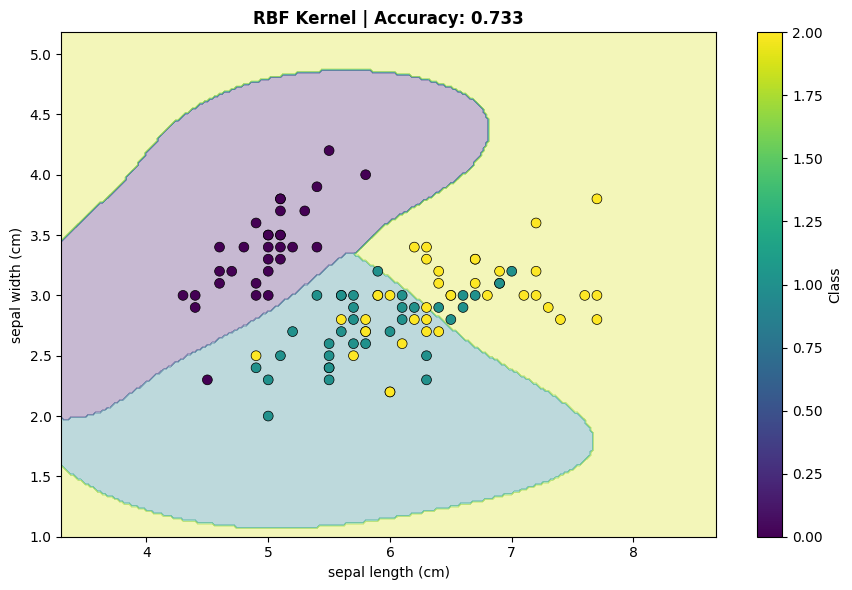

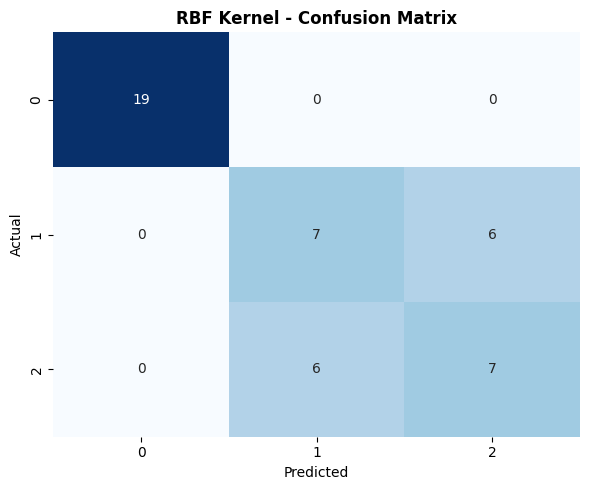

In [22]:
print("\n RBF KERNEL SVM")
svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_rbf.fit(X_train_scaled, y_train)
y_pred_rbf = svm_rbf.predict(X_test_scaled)
print(f"Accuracy: {accuracy_score(y_test, y_pred_rbf):.4f}")
print(f"Support Vectors: {svm_rbf.n_support_}")
plot_decision_boundary(X_train, y_train, svm_rbf,f'RBF Kernel | Accuracy: {accuracy_score(y_test, y_pred_rbf):.3f}', scaler)
plot_confusion_matrix(y_test, y_pred_rbf, 'RBF Kernel - Confusion Matrix')


 POLYNOMIAL KERNEL SVM
Accuracy: 0.7556
Support Vectors: [ 9 31 28]


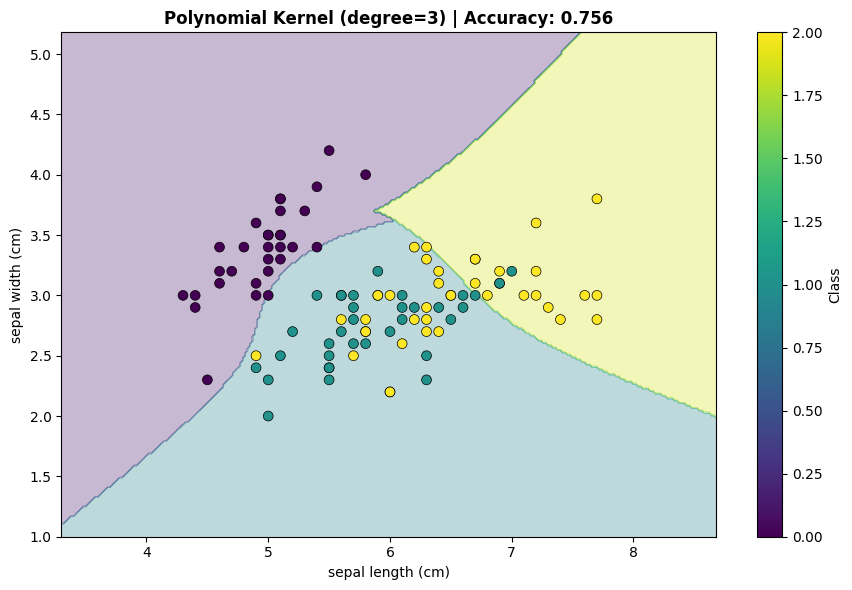

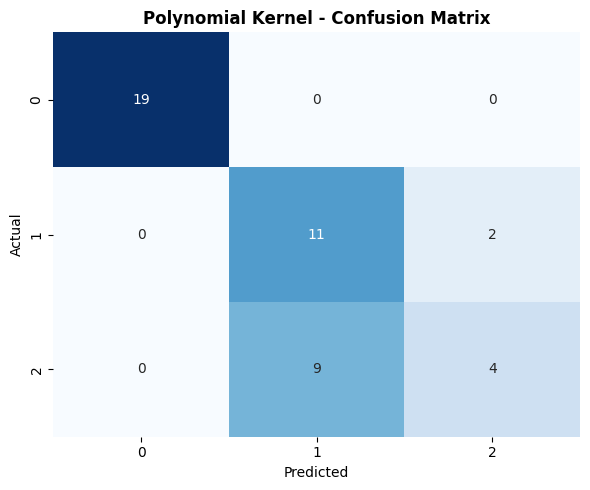

In [23]:
print("\n POLYNOMIAL KERNEL SVM")
svm_poly = SVC(kernel='poly', degree=3, C=1.0, random_state=42)
svm_poly.fit(X_train_scaled, y_train)
y_pred_poly = svm_poly.predict(X_test_scaled)
print(f"Accuracy: {accuracy_score(y_test, y_pred_poly):.4f}")
print(f"Support Vectors: {svm_poly.n_support_}")
plot_decision_boundary(X_train, y_train, svm_poly,f'Polynomial Kernel (degree=3) | Accuracy: {accuracy_score(y_test, y_pred_poly):.3f}', scaler)
plot_confusion_matrix(y_test, y_pred_poly, 'Polynomial Kernel - Confusion Matrix')


 SIGMOID KERNEL SVM
Accuracy: 0.7778
Support Vectors: [ 9 27 26]


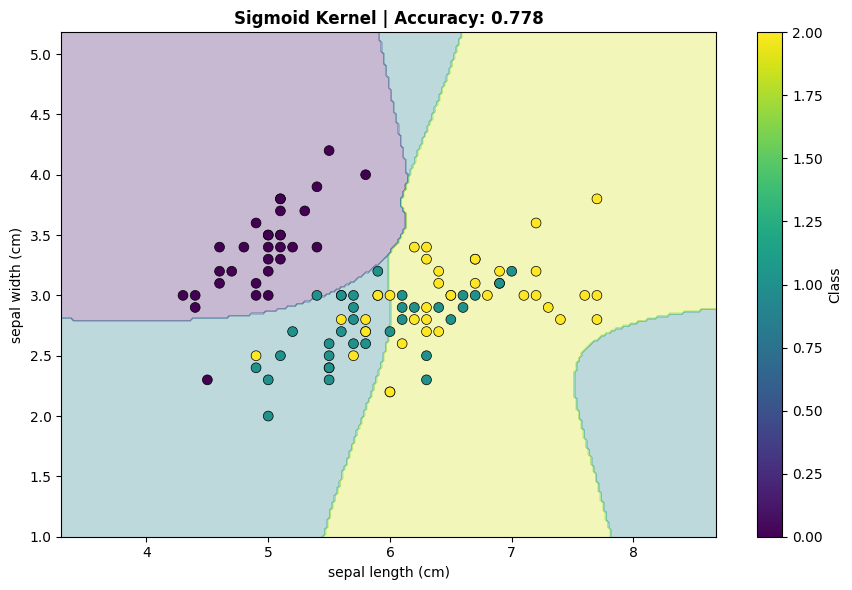

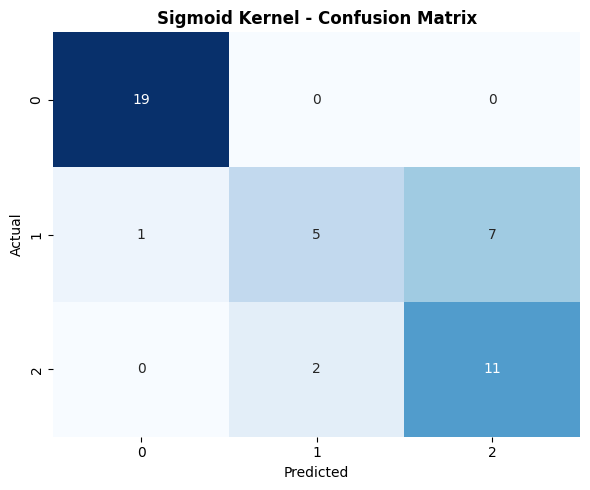

In [24]:
print("\n SIGMOID KERNEL SVM")
svm_sigmoid = SVC(kernel='sigmoid', C=1.0, random_state=42)
svm_sigmoid.fit(X_train_scaled, y_train)
y_pred_sigmoid = svm_sigmoid.predict(X_test_scaled)
print(f"Accuracy: {accuracy_score(y_test, y_pred_sigmoid):.4f}")
print(f"Support Vectors: {svm_sigmoid.n_support_}")
plot_decision_boundary(X_train, y_train, svm_sigmoid,f'Sigmoid Kernel | Accuracy: {accuracy_score(y_test, y_pred_sigmoid):.3f}', scaler)
plot_confusion_matrix(y_test, y_pred_sigmoid, 'Sigmoid Kernel - Confusion Matrix')


TESTING KERNELS ON DIFFERENT DATA PATTERNS



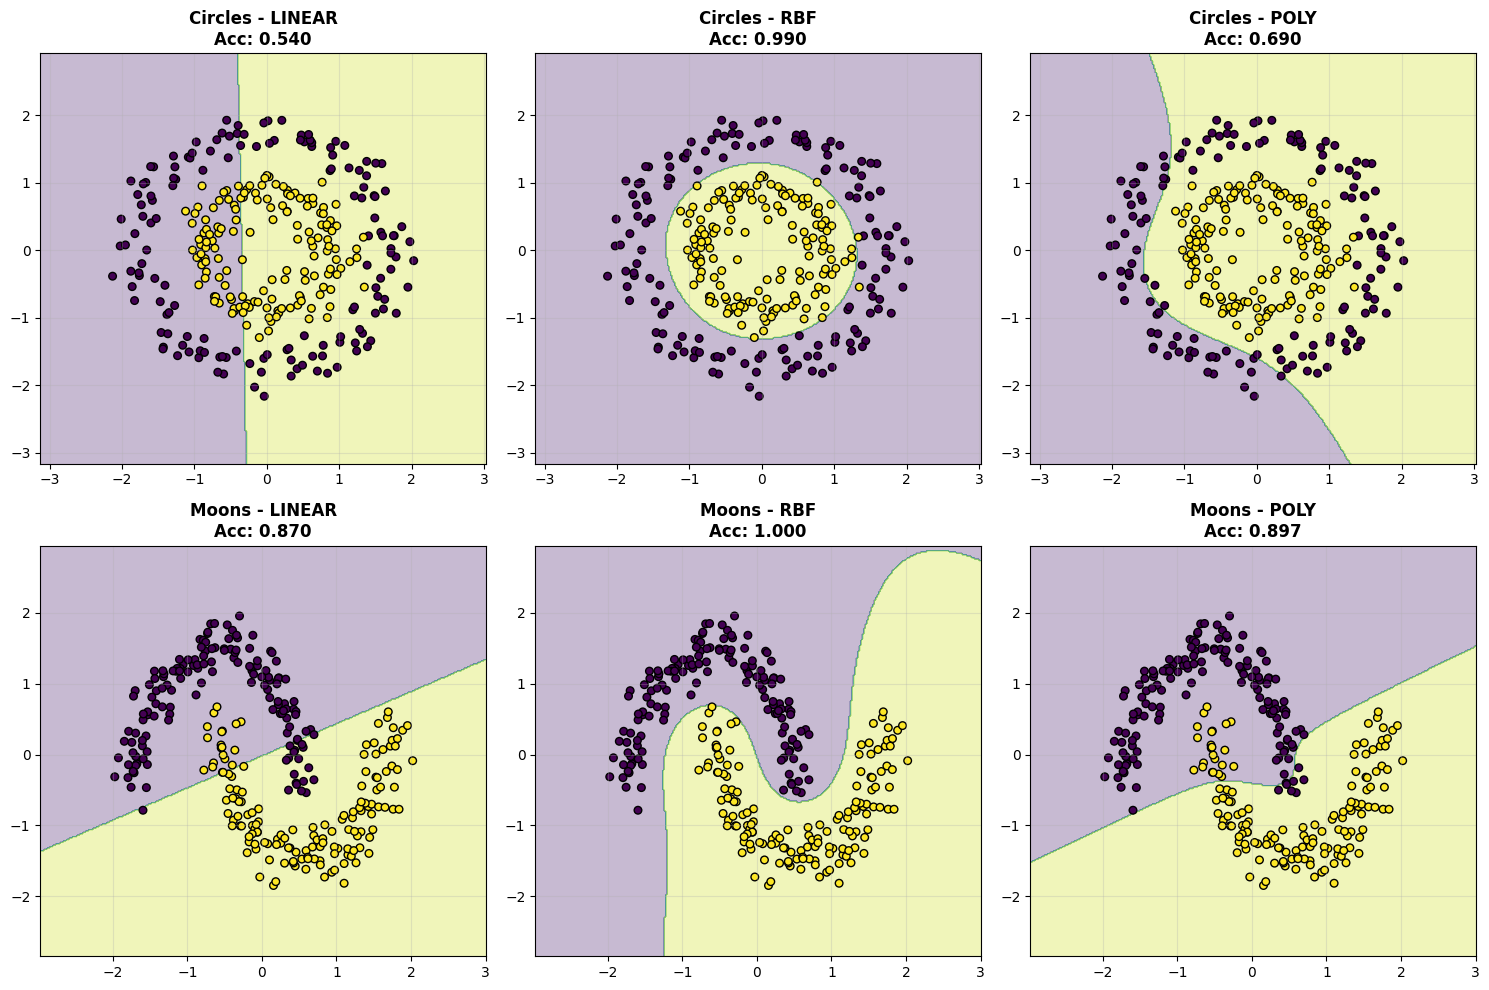

In [25]:
print("\nTESTING KERNELS ON DIFFERENT DATA PATTERNS\n")
datasets = {
    'Circles': make_circles(n_samples=300, noise=0.1, factor=0.5, random_state=42),'Moons': make_moons(n_samples=300, noise=0.1, random_state=42)
}
kernels = ['linear', 'rbf', 'poly']
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
for i, (name, (X_data, y_data)) in enumerate(datasets.items()):
    X_scaled = StandardScaler().fit_transform(X_data)
    for j, kernel in enumerate(kernels):
        model = SVC(kernel=kernel, degree=3 if kernel=='poly' else 3).fit(X_scaled, y_data)
        acc = model.score(X_scaled, y_data)
        ax = axes[i, j]
        h = 0.02
        x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
        y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
        ax.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
        ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_data, cmap='viridis', edgecolors='k', s=30)
        ax.set_title(f'{name} - {kernel.upper()}\nAcc: {acc:.3f}', fontweight='bold')
        ax.grid(alpha=0.3)
plt.tight_layout()
plt.show()



 KERNEL PERFORMANCE COMPARISON
    Kernel  Accuracy  Support Vectors
    Linear  0.733333               56
       RBF  0.733333               65
Polynomial  0.755556               68
   Sigmoid  0.777778               62

 Best Kernel: Sigmoid (0.7778)


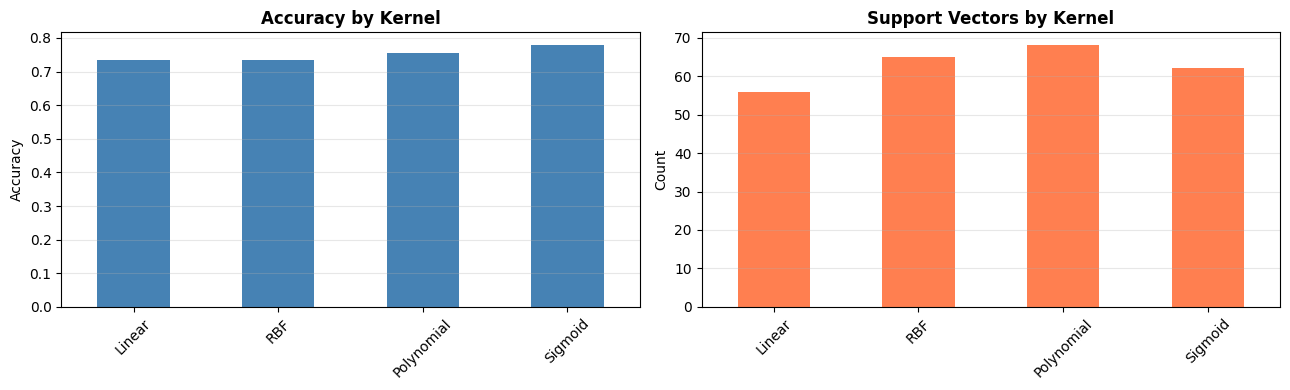

In [26]:
results_data = {
    'Kernel': ['Linear', 'RBF', 'Polynomial', 'Sigmoid'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_linear),accuracy_score(y_test, y_pred_rbf),accuracy_score(y_test, y_pred_poly),
        accuracy_score(y_test, y_pred_sigmoid)
    ],
    'Support Vectors': [
        svm_linear.n_support_.sum(),svm_rbf.n_support_.sum(),svm_poly.n_support_.sum(),svm_sigmoid.n_support_.sum()
    ]
}
results_df = pd.DataFrame(results_data)
print("\n KERNEL PERFORMANCE COMPARISON")
print("="*60)
print(results_df.to_string(index=False))
print("="*60)
print(f"\n Best Kernel: {results_df.loc[results_df['Accuracy'].idxmax(), 'Kernel']} "
      f"({results_df['Accuracy'].max():.4f})")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 4))
results_df.plot(x='Kernel', y='Accuracy', kind='bar', ax=ax1, color='steelblue', legend=False)
ax1.set_title('Accuracy by Kernel', fontweight='bold')
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y', alpha=0.3)
results_df.plot(x='Kernel', y='Support Vectors', kind='bar', ax=ax2, color='coral', legend=False)
ax2.set_title('Support Vectors by Kernel', fontweight='bold')
ax2.set_ylabel('Count')
ax2.set_xlabel('')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


 HYPERPARAMETER TUNING FOR RBF KERNEL

Best Parameters: {'C': 0.1, 'gamma': 'scale'}
Best CV Score: 0.8000
Test Accuracy: 0.7778


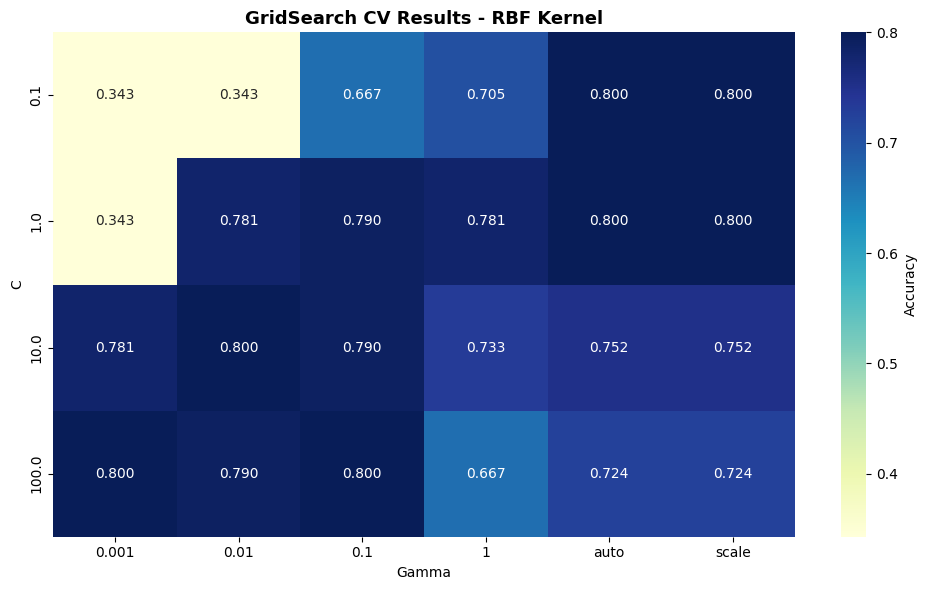

In [27]:
print("\n HYPERPARAMETER TUNING FOR RBF KERNEL\n")
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1]
}
grid_search = GridSearchCV(SVC(kernel='rbf', random_state=42), param_grid,cv=5, scoring='accuracy', n_jobs=-1, verbose=0)
grid_search.fit(X_train_scaled, y_train)
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best CV Score: {grid_search.best_score_:.4f}")
print(f"Test Accuracy: {grid_search.score(X_test_scaled, y_test):.4f}")
results = pd.DataFrame(grid_search.cv_results_)
pivot = results.pivot_table(values='mean_test_score', index='param_C', columns='param_gamma')
plt.figure(figsize=(10, 6))
sns.heatmap(pivot, annot=True, fmt='.3f', cmap='YlGnBu', cbar_kws={'label': 'Accuracy'})
plt.title('GridSearch CV Results - RBF Kernel', fontweight='bold', fontsize=13)
plt.xlabel('Gamma')
plt.ylabel('C')
plt.tight_layout()
plt.show()